In [26]:
# Import packages
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for data frames
import pandas as pd

# Matplotlib for visualizations
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for visualization
import seaborn as sns

In [2]:
# Read the data set
df = pd.read_csv('~/Box Sync/Duke MQM/5. Spring 2/Advanced Analytics & Applications/Class 2/assignment1.csv')

In [91]:
# Check the type of the data set in Python
type(df)

pandas.core.frame.DataFrame

In [4]:
# Check the dimensions of the dataframe
df.shape

(1883, 26)

In [5]:
# Check the variables in the data set
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [92]:
# Look at the data set
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


## Finding an "Interaction" Story

In [93]:
correlations = df.corr()
correlations

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,...,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,...,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,...,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,...,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,...,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,...,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,...,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,...,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,...,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


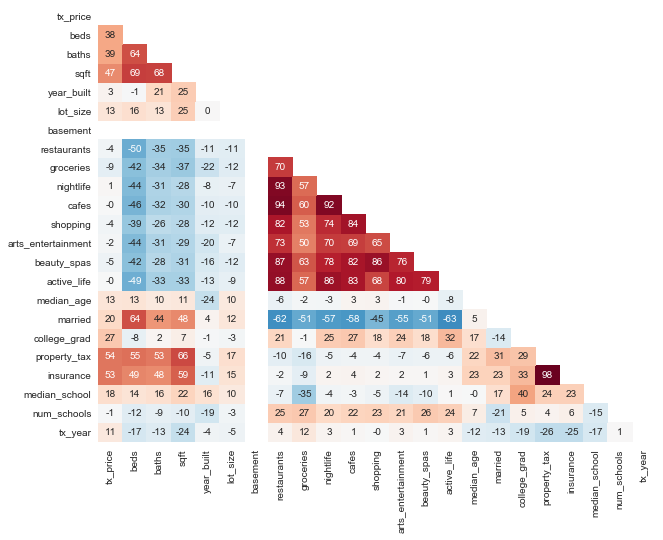

In [95]:
# Visualize the correlation matrix for easier interpretation

# Set the background of the correlation plot to the color white
sns.set_style("white")

# Set the figure size to 10x8
plt.figure(figsize=(10,8))

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate the correlation plot
sns.heatmap(correlations*100, annot=True, fmt='.0f', mask=mask, cbar=False)

The two pieces of the data that interact are cafes (number of cafes within 1 mile) and nightlife (number of nightlife venues within 1 mile).

The interaction is strong and positive.

We want to tell this story because it highlights that convenience stores are concentrated to a particular area rather than being spread out throughout the neighborhood, so residents can find what they need at convenience stores by going to 1 area.

## Finding a "Comparison" Story

In [65]:
# Group the data set by "college_grad" (percent of neighborhood who graduated college),
# then look at the average tx_price (property price) for each group.
df.groupby("college_grad").mean()["tx_price"]

college_grad
5.0      247500.000000
13.0     202000.000000
17.0     305500.000000
19.0     290000.000000
20.0     475000.000000
21.0     428002.000000
22.0     242200.000000
23.0     300000.000000
24.0     413149.111111
25.0     327827.142857
26.0     324133.333333
28.0     407930.000000
29.0     286728.571429
30.0     242960.000000
31.0     316127.111111
32.0     316597.875000
33.0     233726.500000
34.0     316146.875000
35.0     321539.866667
36.0     318801.900000
37.0     386970.875000
38.0     387590.000000
39.0     363372.545455
40.0     364450.625000
41.0     363666.478261
42.0     354549.360000
43.0     507130.571429
44.0     349084.947368
45.0     404227.787879
46.0     435622.600000
             ...      
70.0     430927.521739
71.0     504446.093023
72.0     428983.187500
73.0     410886.461538
74.0     420920.608696
75.0     436669.000000
76.0     494215.843137
77.0     427983.488372
78.0     484160.360000
79.0     484508.565217
80.0     429221.769231
81.0     484162.78431

In [64]:
# Group the data set by "median_school" (median score of the public schools within the district, on the scale 1-10),
# then look at the average tx_price (property price) for each group.
df.groupby("median_school").mean()['tx_price']

median_school
1.0     470310.000000
2.0     424131.888889
3.0     369722.957143
3.5     362800.000000
4.0     395122.136842
4.5     346747.400000
5.0     396544.994975
5.5     440140.920000
6.0     420431.511364
6.5     417284.047619
7.0     412590.191571
7.5     484909.217391
8.0     431477.125341
8.5     429622.156250
9.0     470783.003759
10.0    508541.979592
Name: tx_price, dtype: float64

The data to compare are tx_price (property price) grouped by college_grad (percent of neighborhood who graduated college) and tx_price (property price) grouped by median_school (median score of public schools in the district on the scale 1-10).

Comparing these things show that property prices are higher in neighborhoods with a large percent of residents who graduated from college, and that property prices are, for the most part, higher in neighborhoods with good public schools.

We want to tell this story because it highlights the fact that highly educated residents are in a better financial position to affort more expensive properties, and that good public schools attract residents to the neighborhood. These insights can be helpful to people looking to buy property to identify important factors in their purchasing decisions and understand how those factors can affect the property prices.

## Finding a "Change" Story

In [72]:
# Create a new dataframe that shows the average tx_price (property price) for each tx_year (transaction year)
y=pd.DataFrame(df.groupby("tx_year").mean()["tx_price"])
y

,tx_price
tx_year,
1993,354489.909091
1994,365588.777778
1995,331826.333333
1996,350669.937500
1997,293218.518519
1998,358826.607143
1999,340737.200000
2000,342678.071429
2001,362879.222222


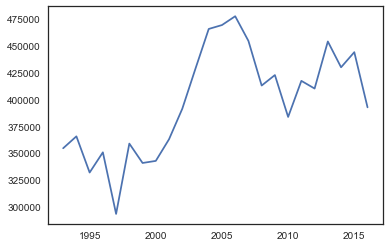

In [73]:
# Plot the average transaction price over time.
plt.plot(y)

In [75]:
# Create a new dataframe that shows the average insurance (cost of monthly homeowner's insurance)
# for each tx_year (transaction year)
x=pd.DataFrame(df.groupby("tx_year").mean()["insurance"])
x

,insurance
tx_year,
1993,233.454545
1994,234.166667
1995,238.277778
1996,211.187500
1997,183.222222
1998,212.964286
1999,183.775000
2000,187.095238
2001,164.400000


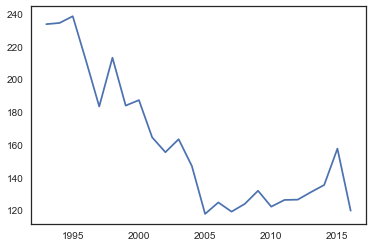

In [76]:
# Plot the cost of monthly homeowner's insurance over time.
plt.plot(x)

In [77]:
# Create a new dataframe that shows the average property_tax (monthly property tax) 
# for each tx_year (transaction year)
z=pd.DataFrame(df.groupby("tx_year").mean()["property_tax"])
z

,property_tax
tx_year,
1993,754.000000
1994,757.277778
1995,758.333333
1996,690.093750
1997,608.851852
1998,702.107143
1999,615.900000
2000,623.071429
2001,542.244444


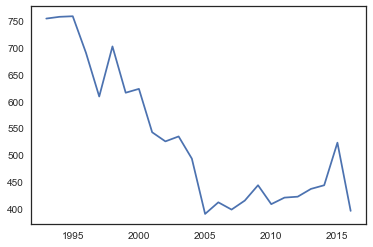

In [78]:
# Plot the average monthly property tax over time.
plt.plot(z)

The data show a change in average property price, average monthly property tax, and average monthly homeowners' insurance.

Teh data changed from 1993 to 2016.

We want to tell this story because although the average property price has been rising since 1993 (except for the housing bubble in the mid 2000s followed by the financial crisis in 2008), average monthly property tax and average monthly homeowners' insurance has been falling since 1993. This insight can serve as an incentive for people who are looking to buy property.

## Finding a "Personal" Story

The data say that, based on the correlation plot above, tx_price (property price) and sqft (total floor area in square feet) are moderately and positively correlated.

This connect to real people because some people prefer a large and spacious house where they can have an office at home, a workout room, and a play room for their children. 

We want to tell this story because it is important to note that the larger the area, the higher the property price. This insight will be helpful for people who are looking to buy property, especially those who are buying property for the first time. We hope that by communicating this insight, property buyers will be able to make an informed decision on their purchase and will be able to make the important trade-off between staying within their budget and their wish to own a large and spacious house.

## Finding a "Factoid" Story

In [80]:
# Look at the summary statistics of each variable in the data set.
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,...,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,...,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,...,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,...,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,...,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,...,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [90]:
# Look at the observations where year_built > tx_year (properties that were built after being purchased).
df[df.year_built > df.tx_year]

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
406,280000,3,2,1040,2013,14810,Single-Family,Siding (Alum/Vinyl),NaN,1.0,...,22,6,40.0,47.0,5.0,211.0,59.0,3.5,2.0,2005
1140,294996,4,2,3711,2003,7405,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,...,17,10,32.0,78.0,57.0,413.0,117.0,6.0,3.0,2002
1459,461000,4,3,4301,2004,9583,Single-Family,NaN,Composition Shingle,1.0,...,30,11,28.0,65.0,60.0,616.0,158.0,7.0,3.0,2003
1540,395000,4,4,4674,2015,9100,Single-Family,Stucco,Composition Shingle,1.0,...,22,12,36.0,47.0,83.0,1188.0,362.0,9.0,3.0,2014
1556,300000,4,4,5800,2002,22215,Single-Family,Brick,Composition Shingle,1.0,...,1,2,47.0,81.0,79.0,1799.0,548.0,6.0,3.0,2000
1572,540000,4,6,4418,2007,11325,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,...,43,17,29.0,75.0,45.0,868.0,264.0,8.0,3.0,2005
1718,550000,5,3,4681,2006,11761,Single-Family,Combination,Composition Shingle,1.0,...,36,22,40.0,87.0,84.0,1200.0,349.0,9.0,3.0,2005
1782,350000,5,4,4252,2010,22215,Single-Family,Other,Composition Shingle,1.0,...,17,7,33.0,46.0,63.0,739.0,225.0,4.0,3.0,2003
1798,550000,5,4,4693,2006,16988,Single-Family,Brick,Composition Shingle,1.0,...,4,8,41.0,76.0,56.0,860.0,262.0,6.0,3.0,2005
1809,400000,5,4,5003,2013,21344,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,...,73,19,41.0,80.0,78.0,1217.0,371.0,9.0,3.0,2012


One factoid is that there are 19 purchases in the data set where tx_year (the transaction year) is before year_built (the year the property was built).

This stands out from the rest of the data set because the remaining 1864 purchases were made after the property was built. This suggested that the majority of the purchases captured in this data set reflected regular purchases where the buyers had the intention to live in the properties, looked at existing properties, and assessed them against their preferences before making the purchases. Meanwhile, the 19 purchases are likely to reflect purchases where the buyers might have been presented with a discount on new properties before they were built.

We want to tell this story because property buyers might benefit from discounts on new properties that were not yet built, despite the disadvantage of not being able to see the properties in real life before making the purchasing decision.